In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor

In [3]:

df = pd.read_csv (r'C:\Restricted\study\DataScience\TCD\MachineLearning\Week5Assignment\timeseries\timeseries_data.csv')
df= df.iloc[:,1:15] #17
df.dropna(inplace=True)
df.drop(columns='date',inplace=True)
indices_list = df.index.values

In [4]:
y=df.loc[:, 'USAGE'] 
y
#print(df.iloc[:,4:10].head())

3        30.000000
4        40.000000
5        28.000000
12       34.000000
13       19.000000
           ...    
24129     0.000000
24130    25.000000
24131    10.333333
24132     7.250000
24133    12.416667
Name: USAGE, Length: 16601, dtype: float64

In [5]:

X_to_normalize_1=df.iloc[:,1:4]
X_to_normalize_2=df.iloc[:,10:13]

X_normalized_1 = normalize(X_to_normalize_1,norm='max', axis=0)
X_normalized_2 = normalize(X_to_normalize_2,norm='max', axis=0)
X_normalized_1df= pd.DataFrame(X_normalized_1,index= indices_list)
X_normalized_2df= pd.DataFrame(X_normalized_2,index= indices_list)

print(X_normalized_2)

[[0.775      0.975      0.375     ]
 [0.75       0.775      0.975     ]
 [1.         0.75       0.775     ]
 ...
 [0.625      0.         0.325     ]
 [0.25833333 0.625      0.        ]
 [0.18125    0.25833333 0.625     ]]


In [6]:
X_rest=df.iloc[:,4:10]
X = pd.concat([X_rest, X_normalized_1df, X_normalized_2df], axis=1,join='inner')
X.columns = [ 'rain', 'temp', 'wdsp', 'STATION_68.0', 'STATION_78.0',
       'STATION_83.0', 'STATION_85.0', 'STATION_88.0', 'STATION_97.0', 'W1',
       'W2', 'W3']
X

,rain,temp,wdsp,STATION_68.0,STATION_78.0,STATION_83.0,STATION_85.0,STATION_88.0,STATION_97.0,W1,W2,W3
3,1,0,0,0,0,0,0.0,0.017316,0.333333,0.775000,0.975000,0.37500
4,1,0,0,0,0,0,0.0,0.333333,0.259259,0.750000,0.775000,0.97500
5,1,0,0,0,0,0,0.0,0.303030,0.222222,1.000000,0.750000,0.77500
12,1,0,0,0,0,0,0.0,0.575758,0.185185,0.600000,0.881250,0.45000
13,1,0,0,0,0,0,0.0,0.017316,0.111111,0.850000,0.600000,0.88125
...,...,...,...,...,...,...,...,...,...,...,...,...
24129,0,0,0,0,0,1,0.0,0.017316,0.111111,0.325000,0.300000,0.17500
24130,0,0,0,0,0,1,0.0,0.714286,0.407407,0.000000,0.325000,0.30000
24131,0,0,0,0,0,1,0.0,0.458874,0.296296,0.625000,0.000000,0.32500
24132,0,0,0,0,0,1,0.0,0.493506,0.555556,0.258333,0.625000,0.00000


In [7]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42)


In [10]:
baseline_model = DummyRegressor(strategy='mean').fit(X, y)
y_baseline = baseline_model.predict(X)

print("Mean squared error of baseline model %f"%(mean_squared_error(y,y_baseline)))

Mean squared error of baseline model 63.562655


In [11]:
linear_reg_model = LinearRegression().fit( X_train, y_train)

y_pred = linear_reg_model.predict(X_test)
y_train_pred = linear_reg_model.predict(X_train)
print("Mean squared error of test data %f"%(mean_squared_error(y_test,y_pred)))
print("Mean squared error of train data %f"%(mean_squared_error(y_train,y_train_pred)))
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(linear_reg_model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('Cross Validation Scores Mean: {}'.format(np.array(scores).mean()))
print('Cross Validation Scores Standard Deviation: {}'.format(np.array(scores).std()))

Mean squared error of test data 47.342989
Mean squared error of train data 48.396675
Cross Validation Scores Mean: -48.48151767660189
Cross Validation Scores Standard Deviation: 1.5652833777525033


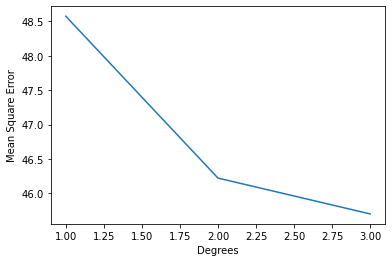

In [22]:
mean_err=[]; std_err=[]
degrees=[1,2,3]
for d in degrees:
    model = SVR(kernel="poly", C=100, gamma="auto", degree=d, epsilon=0.1, coef0=1) 
    model.fit(X_train, y_train)
    ypred = model.predict(X_train)
    mse = mean_squared_error(y_train, ypred)
    mean_err.append(np.array(mse).mean())
    std_err.append(np.array(mse).std())
plt.errorbar( degrees,mean_err, yerr=std_err)
plt.xlabel('Degrees') 
plt.ylabel('Mean Square Error')
plt.show()

In [14]:
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svr_poly.fit(X_train, y_train)
y_pred = svr_poly.predict(X_test)
y_train_pred = svr_poly.predict(X_train)
print("Mean squared error of test data %f"%(mean_squared_error(y_test,y_pred)))
print("Mean squared error of train data %f"%(mean_squared_error(y_train,y_train_pred)))
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(svr_poly, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('Cross Validation Scores Mean: {}'.format(np.array(scores).mean()))
print('Cross Validation Scores Standard Deviation: {}'.format(np.array(scores).std()))

Mean squared error of test data 44.847694
Mean squared error of train data 45.703120
Cross Validation Scores Mean: -46.156496886592755
Cross Validation Scores Standard Deviation: 1.6241885694691554


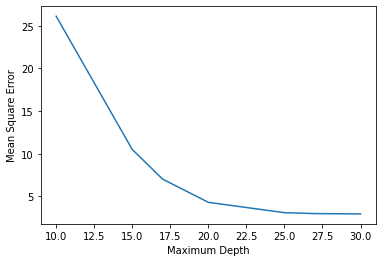

In [23]:
 

mean_err=[]; std_err=[]
max_depth=[10,15,17,20,25,27,30]
for m in max_depth:
    model = RandomForestRegressor(max_depth=m, random_state=0) 
    model.fit(X_train, y_train)
    ypred = model.predict(X_train)
    mse = mean_squared_error(y_train, ypred)
    mean_err.append(np.array(mse).mean())
    std_err.append(np.array(mse).std())
plt.errorbar( max_depth,mean_err, yerr=std_err)
plt.xlabel('Maximum Depth') 
plt.ylabel('Mean Square Error')
plt.show()

In [15]:

regr = RandomForestRegressor(max_depth=27, random_state=0) 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)
print("Mean squared error of test data %f"%(mean_squared_error(y_test,y_pred)))
print("Mean squared error of train data %f"%(mean_squared_error(y_train,y_train_pred)))
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(regr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('Cross Validation Scores Mean: {}'.format(np.array(scores).mean()))
print('Cross Validation Scores Standard Deviation: {}'.format(np.array(scores).std()))

Mean squared error of test data 23.410315
Mean squared error of train data 2.970991
Cross Validation Scores Mean: -21.256537574256278
Cross Validation Scores Standard Deviation: 1.0099017597909086


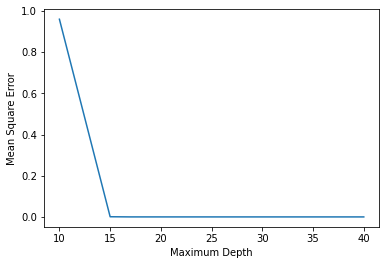

In [25]:
mean_err=[]; std_err=[]
max_depth=[10,15,17,20,25,30,40]
for m in max_depth:
    model = XGBRegressor(max_depth=m)
    model.fit(X_train, y_train)
    ypred = model.predict(X_train)
    mse = mean_squared_error(y_train, ypred)
    mean_err.append(np.array(mse).mean())
    std_err.append(np.array(mse).std())
plt.errorbar( max_depth,mean_err, yerr=std_err)
plt.xlabel('Maximum Depth') 
plt.ylabel('Mean Square Error')
plt.show()

In [27]:

model = XGBRegressor(max_depth=15) #,booster='dart',n_estimators=100
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Mean squared error of test data %f"%(mean_squared_error(y_test,y_pred)))
print("Mean squared error of train data %f"%(mean_squared_error(y_train,y_train_pred)))
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('Cross Validation Scores Mean: {}'.format(np.array(scores).mean()))
print('Cross Validation Scores Standard Deviation: {}'.format(np.array(scores).std()))



Mean squared error of test data 26.987652
Mean squared error of train data 0.000870
Cross Validation Scores Mean: -23.32308288401515
Cross Validation Scores Standard Deviation: 1.2965445285615982
